In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
% matplotlib as mpl
mpl.rcParams['figure.dpi'] = 100
plt.style.use('fivethirtyeight')

UsageError: Line magic function `%` not found.


In [2]:
df = pd.read_csv('C:/Users/Khush/Desktop/Datesets/cleaned_data.csv')
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month,EDUCATION_CAT,graduate school,high school,others,university
0,798fc410-45c1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,1,university,0,0,0,1
1,8a8c8f3b-8eb4,120000,2,2,2,26,-1,2,0,0,...,1000,1000,0,2000,1,university,0,0,0,1
2,85698822-43f5,90000,2,2,2,34,0,0,0,0,...,1000,1000,1000,5000,0,university,0,0,0,1
3,0737c11b-be42,50000,2,2,1,37,0,0,0,0,...,1200,1100,1069,1000,0,university,0,0,0,1
4,3b7f77cc-dbc0,50000,1,2,1,57,-1,0,-1,0,...,10000,9000,689,679,0,university,0,0,0,1


In [3]:
df['default payment next month'].mean()

0.2217971797179718

In [6]:
df.groupby('default payment next month')['ID'].count()

default payment next month
0    20750
1     5914
Name: ID, dtype: int64

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [8]:
lr_model = LogisticRegression()

In [9]:
lr_model

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [10]:
x = df['LIMIT_BAL'].values.reshape(-1,1)
y = df['default payment next month']

In [15]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=101)

In [16]:
lr_model.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [17]:
lr_model.score(x_test , y_test)

0.78

In [18]:
pred = lr_model.predict(x_test)
pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [19]:
pred_prob = lr_model.predict_proba(x_test)
pred_prob

array([[0.85704879, 0.14295121],
       [0.83932616, 0.16067384],
       [0.6343848 , 0.3656152 ],
       ...,
       [0.82981809, 0.17018191],
       [0.69563796, 0.30436204],
       [0.85704879, 0.14295121]])

In [21]:
from sklearn.metrics import roc_auc_score, roc_curve, precision_recall_curve

In [23]:
roc_auc_score(y_test,pred_prob[:,1])

0.6170050717511655

In [24]:
fpr, tpr, thres = roc_curve(y_test, pred_prob[:,1])

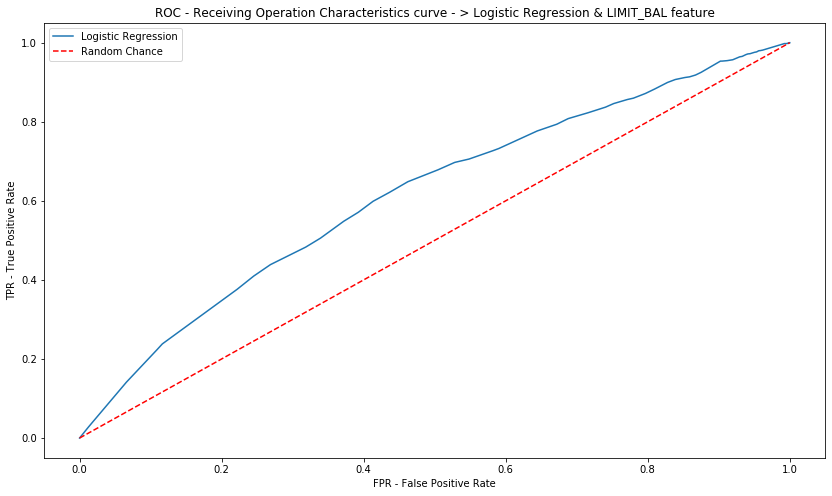

In [25]:
plt.figure(figsize=(14,8))
plt.plot(fpr,tpr,"-")
plt.plot([0,1],[0,1],'r--')

plt.xlabel('FPR - False Positive Rate')
plt.ylabel('TPR - True Positive Rate')
plt.title('ROC - Receiving Operation Characteristics curve - > Logistic Regression & LIMIT_BAL feature')
plt.legend(['Logistic Regression', 'Random Chance'])

In [26]:
from sklearn.metrics import precision_recall_curve, precision_score, precision_recall_fscore_support

In [27]:
precision, recall, thresh1=precision_recall_curve(y_test,pred_prob[:,1])

Text(0.5, 1.0, 'Precision and Recall curve - > Logistic Regression & LIMIT_BAL')

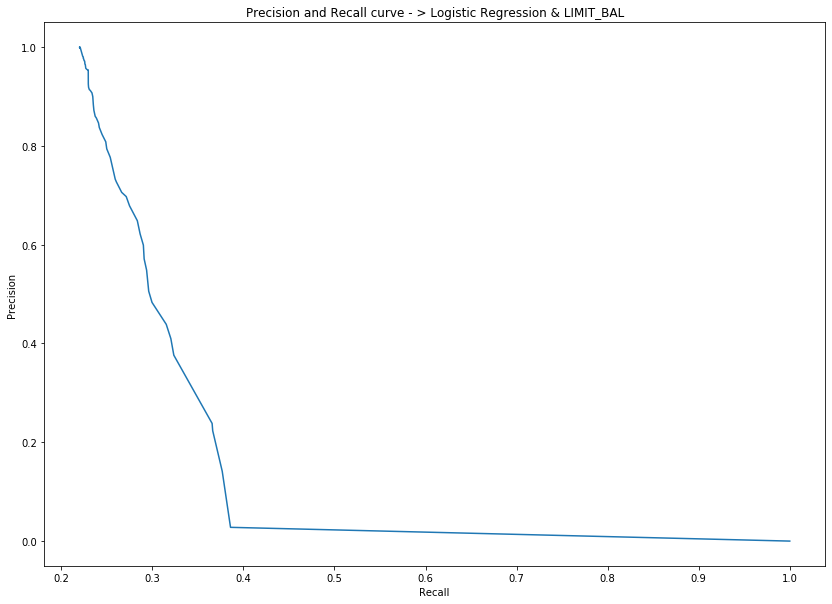

In [29]:
plt.figure(figsize=(14,10))
plt.plot(precision,recall)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision and Recall curve - > Logistic Regression & LIMIT_BAL')

In [30]:
from sklearn.metrics import auc

In [31]:
auc(recall,precision)

0.3147009000933155

In [32]:
xtrain_pred = lr_model.predict(x_train)
xtrain_pred_proba = lr_model.predict_proba(x_train)
xtrain_pred_proba

array([[0.58526414, 0.41473586],
       [0.61826488, 0.38173512],
       [0.79861906, 0.20138094],
       ...,
       [0.7755496 , 0.2244504 ],
       [0.75066247, 0.24933753],
       [0.79861906, 0.20138094]])

In [33]:
roc_auc_score(y_train, xtrain_pred_proba[:,1])

0.6193668918916676